In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from os import listdir

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from scipy.cluster.hierarchy import cut_tree

In [222]:
filepaths = [f for f in listdir("./data") if f.endswith('.csv')]
files = [pd.read_csv('./data/' + f, sep=",", encoding="ISO-8859-1", header=0) for f in filepaths]

In [223]:
cellphones = pd.concat(files)

In [224]:
cellphones.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933


In [225]:
cellphones.shape

(13197237, 8)

In [226]:
cellphones.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197237 entries, 0 to 2407383
Data columns (total 8 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   datetime     13197237 non-null  object 
 1   CellID       13197237 non-null  int64  
 2   countrycode  13197237 non-null  int64  
 3   smsin        5217770 non-null   float64
 4   smsout       3077028 non-null   float64
 5   callin       3625162 non-null   float64
 6   callout      5629788 non-null   float64
 7   internet     5915110 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 906.2+ MB


In [227]:
#We Can see that alot of the value is missing so we are going to replace the NAN value with Zero
df_null = round(100*(cellphones.isnull().sum())/len(cellphones), 2)
df_null


datetime        0.00
CellID          0.00
countrycode     0.00
smsin          60.46
smsout         76.68
callin         72.53
callout        57.34
internet       55.18
dtype: float64

In [228]:
cellphones['smsin'] = cellphones['smsin'].fillna(0)
cellphones['smsout'] = cellphones['smsin'].fillna(0)
cellphones['callin'] = cellphones['callin'].fillna(0)
cellphones['callout'] = cellphones['callout'].fillna(0)
cellphones['internet'] = cellphones['internet'].fillna(0)

df_null = round(100*(cellphones.isnull().sum())/len(cellphones), 2)
df_null

datetime       0.0
CellID         0.0
countrycode    0.0
smsin          0.0
smsout         0.0
callin         0.0
callout        0.0
internet       0.0
dtype: float64

In [229]:
cellphones.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197237 entries, 0 to 2407383
Data columns (total 8 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   datetime     13197237 non-null  object 
 1   CellID       13197237 non-null  int64  
 2   countrycode  13197237 non-null  int64  
 3   smsin        13197237 non-null  float64
 4   smsout       13197237 non-null  float64
 5   callin       13197237 non-null  float64
 6   callout      13197237 non-null  float64
 7   internet     13197237 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 906.2+ MB


In [230]:
# Changing the datatype of Customer Id as per Business understanding

cellphones.loc[:,'CellID'] = cellphones.loc[:,'CellID'].astype(str)
cellphones.loc[:,'datetime'] = pd.to_datetime(cellphones.loc[:,'datetime'],format='%Y-%m-%d %H:%M:%S')
cellphones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197237 entries, 0 to 2407383
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   CellID       object        
 2   countrycode  int64         
 3   smsin        float64       
 4   smsout       float64       
 5   callin       float64       
 6   callout      float64       
 7   internet     float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 906.2+ MB


In [231]:
#First we will group the custmers by how much the spent
cellphones.loc[:,'Amount'] = cellphones.loc[:,'smsin']+cellphones.loc[:,'smsout']+cellphones.loc[:,'callin']+cellphones.loc[:,'callout']+cellphones.loc[:,'internet']
cust_spending_grouping = cellphones.groupby('CellID')['Amount'].sum()
cust_spending_grouping = cust_spending_grouping.reset_index()
cust_spending_grouping.head()

,CellID,Amount
0,1,10509.0913
1,10,6848.9344
2,100,17675.5173
3,1000,24415.9948
4,10000,21759.4396


In [12]:
cust_spending_grouping.shape

(10000, 2)

In [13]:
cust_spending_grouping.describe()

,Amount
count,1.000000e+04
mean,7.459352e+04
std,1.190192e+05
min,3.323726e+02
25%,1.502578e+04
50%,3.619679e+04
75%,7.834237e+04
max,1.572655e+06


array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

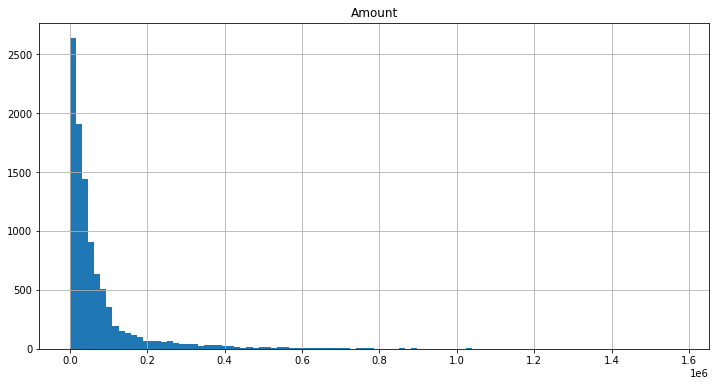

In [14]:
cust_spending_grouping.hist(column='Amount', bins=100, figsize=(12,6))

Text(0.5, 0, 'Attributes')

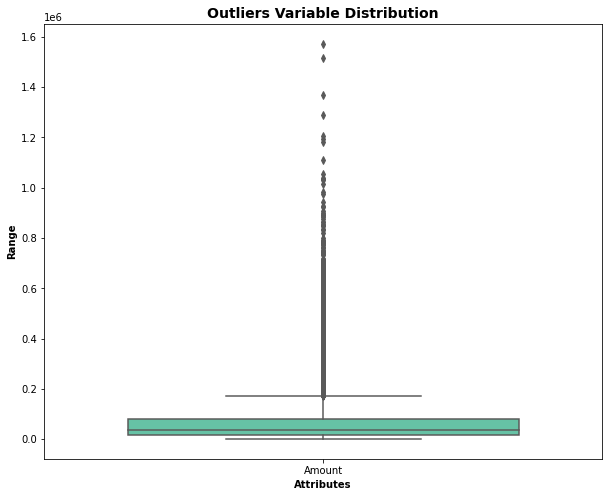

In [15]:
attributes = ['Amount']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = cust_spending_grouping[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [16]:
#Removing (statistical) outliers for Amount
Q1 = cust_spending_grouping.Amount.quantile(0.25)
Q3 = cust_spending_grouping.Amount.quantile(0.75)
IQR = Q3 - Q1
cust_spending_grouping = cust_spending_grouping[(cust_spending_grouping.Amount >= Q1 - 1.5*IQR) & (cust_spending_grouping.Amount <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

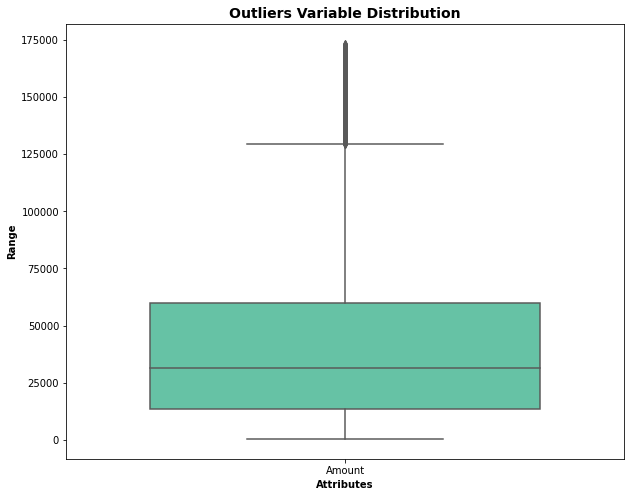

In [17]:
attributes = ['Amount']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = cust_spending_grouping[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

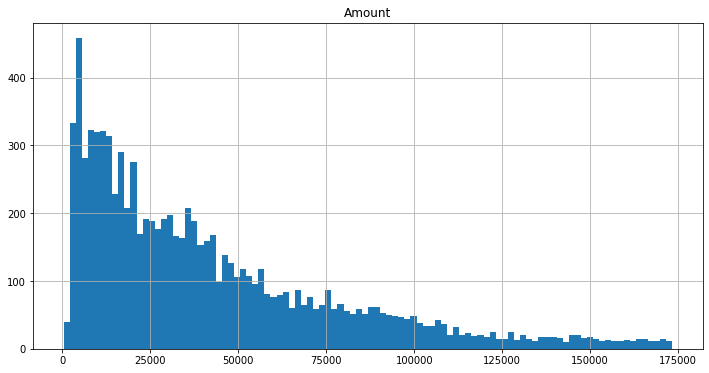

In [18]:
cust_spending_grouping.hist(column='Amount', bins=100, figsize=(12,6))

In [19]:
# Rescaling the attributes

cust_spending_grouping_df = cust_spending_grouping[['Amount']]

# Instantiate
scaler = StandardScaler()

# fit_transform
cust_spending_grouping_df_scaled = scaler.fit_transform(cust_spending_grouping_df)
cust_spending_grouping_df_scaled.shape

(8983, 1)

In [20]:
cust_spending_grouping_df_scaled = pd.DataFrame(cust_spending_grouping_df_scaled)
cust_spending_grouping_df_scaled.columns = ['Amount']
cust_spending_grouping_df_scaled.head()

,Amount
0,-0.854568
1,-0.952765
2,-0.662303
3,-0.481465
4,-0.552737


array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

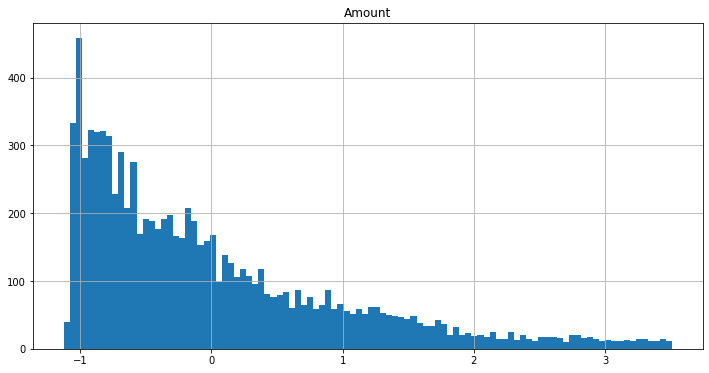

In [21]:
cust_spending_grouping_df_scaled.hist(column='Amount', bins=100, figsize=(12,6))

In [22]:
cust_spending_grouping_df_scaled.describe()

,Amount
count,8.983000e+03
mean,2.626074e-16
std,1.000056e+00
min,-1.127595e+00
25%,-7.781115e-01
50%,-2.944904e-01
75%,4.678062e-01
max,3.513089e+00


In [23]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(cust_spending_grouping_df_scaled)

KMeans(max_iter=50, n_clusters=4)

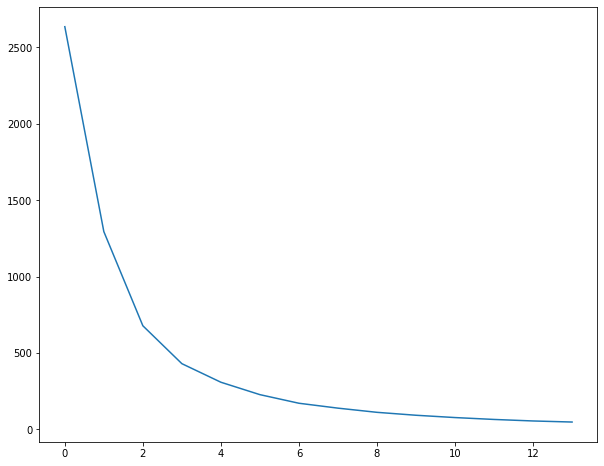

In [24]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cust_spending_grouping_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [25]:
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cust_spending_grouping_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cust_spending_grouping_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6678521427505614
For n_clusters=3, the silhouette score is 0.5968743194982374
For n_clusters=4, the silhouette score is 0.6013792857965597
For n_clusters=5, the silhouette score is 0.5875974721924797
For n_clusters=6, the silhouette score is 0.5665001283701419
For n_clusters=7, the silhouette score is 0.5553800585806937
For n_clusters=8, the silhouette score is 0.5588907419682871
For n_clusters=9, the silhouette score is 0.546122501128325
For n_clusters=10, the silhouette score is 0.5480945294083936
For n_clusters=11, the silhouette score is 0.5470446499708479
For n_clusters=12, the silhouette score is 0.5470414918109433
For n_clusters=13, the silhouette score is 0.5531150168528763
For n_clusters=14, the silhouette score is 0.5518984189746888
For n_clusters=15, the silhouette score is 0.5536518819131707


In [26]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(cust_spending_grouping_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [27]:
kmeans.labels_

array([3, 3, 3, ..., 0, 0, 3])

In [28]:
# assign the label
cust_spending_grouping['Cluster_Id'] = kmeans.labels_
cust_spending_grouping.head()

,CellID,Amount,Cluster_Id
0,1,10509.0913,3
1,10,6848.9344,3
2,100,17675.5173,3
3,1000,24415.9948,3
4,10000,21759.4396,3


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

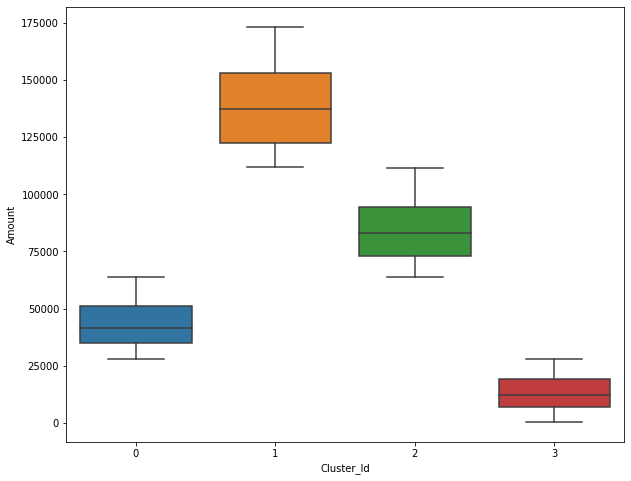

In [29]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=cust_spending_grouping)

In [30]:
#The Second Section
#here we will try to cluster the data to find the proper daily offers and 


In [31]:
cellphones.loc[:,'datetime'] = pd.to_datetime(cellphones.loc[:,'datetime'],format='%Y-%m-%d %H:%M:%S')
cellphones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197237 entries, 0 to 2407383
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   CellID       object        
 2   countrycode  int64         
 3   smsin        float64       
 4   smsout       float64       
 5   callin       float64       
 6   callout      float64       
 7   internet     float64       
 8   Amount       float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 1006.9+ MB


In [32]:
daily_offer = cellphones

In [33]:
daily_offer.loc[:,'datetime'] = daily_offer.loc[:,'datetime'].dt.date

In [38]:
gp_daily_offer.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,Amount
0,2013-11-02,1,0,0.2445,0.2445,0.0000,0.0000,0.0000,0.4890
1,2013-11-02,1,39,1.4952,1.4952,0.2708,0.3004,46.5094,50.0710
2,2013-11-02,1,53,0.0018,0.0018,0.0000,0.0000,0.0000,0.0036
3,2013-11-02,2,0,0.2458,0.2458,0.0000,0.0000,0.0000,0.4916
4,2013-11-02,2,39,1.5028,1.5028,0.2751,0.3023,46.6933,50.2763


In [46]:
gp_daily_offer = daily_offer.groupby(['datetime','CellID'],as_index=False).sum()

In [47]:
gp_daily_offer.reset_index()
gp_daily_offer.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,Amount
0,2013-11-02,1,10480,86.4157,86.4157,47.8908,53.5900,1515.6415,1789.9537
1,2013-11-02,10,8343,67.5846,67.5846,37.7126,43.0524,934.3876,1150.3218
2,2013-11-02,100,10646,55.9419,55.9419,37.4252,43.1022,1963.1548,2155.5660
3,2013-11-02,1000,208632,327.2457,327.2457,208.9230,210.8084,4334.8450,5409.0678
4,2013-11-02,10000,192797,151.0133,151.0133,112.7380,117.7561,2761.8810,3294.4017


In [49]:
gp_daily_offer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     60000 non-null  object 
 1   CellID       60000 non-null  object 
 2   countrycode  60000 non-null  int64  
 3   smsin        60000 non-null  float64
 4   smsout       60000 non-null  float64
 5   callin       60000 non-null  float64
 6   callout      60000 non-null  float64
 7   internet     60000 non-null  float64
 8   Amount       60000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 4.6+ MB


In [50]:
#Removing (statistical) outliers for Amount
Q1 = gp_daily_offer.Amount.quantile(0.25)
Q3 = gp_daily_offer.Amount.quantile(0.75)
IQR = Q3 - Q1
gp_daily_offer = gp_daily_offer[(gp_daily_offer.Amount >= Q1 - 1.5*IQR) & (gp_daily_offer.Amount <= Q3 + 1.5*IQR)]

<AxesSubplot:>

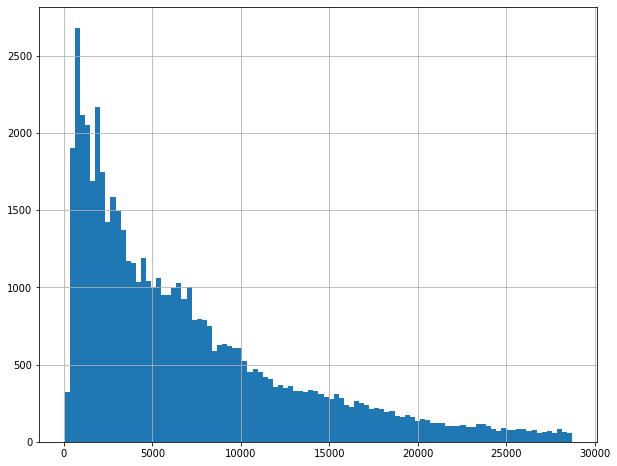

In [51]:
gp_daily_offer.Amount.hist(bins=100)

In [52]:
# Rescaling the attributes

gp_daily_offer_df = gp_daily_offer[['Amount']]

# Instantiate
scaler = StandardScaler()

# fit_transform
gp_daily_offer_df_scaled = scaler.fit_transform(gp_daily_offer_df)
gp_daily_offer_df_scaled.shape

(53921, 1)

In [53]:
gp_daily_offer_df_scaled = pd.DataFrame(gp_daily_offer_df_scaled)
gp_daily_offer_df_scaled.columns = ['Amount']
gp_daily_offer_df_scaled.head()

,Amount
0,-0.840033
1,-0.943382
2,-0.780959
3,-0.255273
4,-0.596951


In [54]:
gp_daily_offer_df_scaled.describe()

,Amount
count,5.392100e+04
mean,-6.746868e-17
std,1.000009e+00
min,-1.121085e+00
25%,-7.814597e-01
50%,-2.977844e-01
75%,4.645924e-01
max,3.509935e+00


In [55]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(gp_daily_offer_df_scaled)

KMeans(max_iter=50, n_clusters=4)

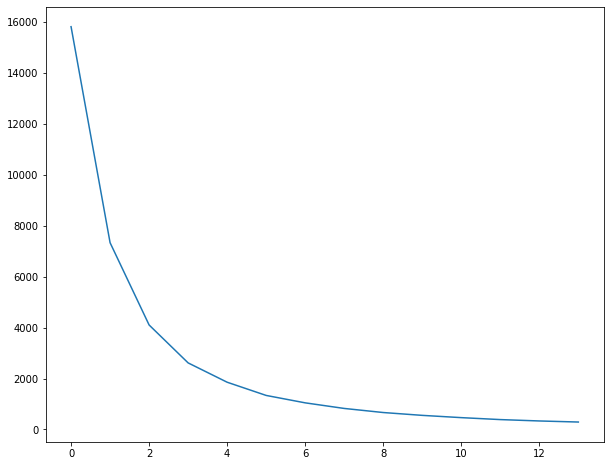

In [56]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(gp_daily_offer_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [57]:
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(gp_daily_offer_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(gp_daily_offer_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6660082973186474
For n_clusters=3, the silhouette score is 0.6089198717083774
For n_clusters=4, the silhouette score is 0.6012811253076348
For n_clusters=5, the silhouette score is 0.5853264913863324
For n_clusters=6, the silhouette score is 0.5639340947166055
For n_clusters=7, the silhouette score is 0.563067092005454
For n_clusters=8, the silhouette score is 0.5563099560371856
For n_clusters=9, the silhouette score is 0.5504551360977228
For n_clusters=10, the silhouette score is 0.5485896676085277
For n_clusters=11, the silhouette score is 0.5453109929280657
For n_clusters=12, the silhouette score is 0.5437177694592754
For n_clusters=13, the silhouette score is 0.5479185651417956
For n_clusters=14, the silhouette score is 0.5484599293778384
For n_clusters=15, the silhouette score is 0.5481340269979587


In [58]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(gp_daily_offer_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [59]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 1])

In [60]:
# assign the label
gp_daily_offer['Cluster_Id'] = kmeans.labels_
gp_daily_offer.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,Amount,Cluster_Id
0,2013-11-02,1,10480,86.4157,86.4157,47.8908,53.5900,1515.6415,1789.9537,1
1,2013-11-02,10,8343,67.5846,67.5846,37.7126,43.0524,934.3876,1150.3218,1
2,2013-11-02,100,10646,55.9419,55.9419,37.4252,43.1022,1963.1548,2155.5660,1
3,2013-11-02,1000,208632,327.2457,327.2457,208.9230,210.8084,4334.8450,5409.0678,1
4,2013-11-02,10000,192797,151.0133,151.0133,112.7380,117.7561,2761.8810,3294.4017,1


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

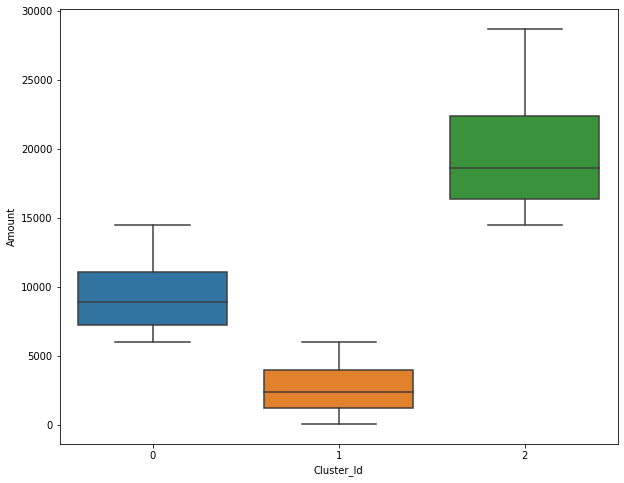

In [61]:
# Box plot to visualize Cluster Id vs Amount

sns.boxplot(x='Cluster_Id', y='Amount', data=gp_daily_offer)

In [62]:
#In this section will try to find the peak

In [68]:
cellphones.loc[:,'datetime'] = pd.to_datetime(cellphones.loc[:,'datetime'],format='%Y-%m-%d %H:%M:%S')

In [85]:
peak = cellphones

peak.loc[:,'datetime'] = peak.loc[:,'datetime'].dt.hour

In [86]:
peak.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,Amount
0,0,1,0,0.2445,0.2445,0.0000,0.0000,0.0000,0.4890
1,0,1,39,1.4952,1.4952,0.2708,0.3004,46.5094,50.0710
2,0,1,53,0.0018,0.0018,0.0000,0.0000,0.0000,0.0036
3,0,2,0,0.2458,0.2458,0.0000,0.0000,0.0000,0.4916
4,0,2,39,1.5028,1.5028,0.2751,0.3023,46.6933,50.2763


In [87]:
peak.datetime.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [88]:
gp_peak = peak.groupby(['datetime'],as_index=False).sum()
gp_peak.head()

,datetime,countrycode,smsin,smsout,callin,callout,internet,Amount
0,0,136159328,483148.0312,483148.0312,133332.3288,174288.5625,1.986514e+07,2.113906e+07
1,1,123758621,235125.9928,235125.9928,62859.0706,88692.5743,1.647608e+07,1.709788e+07
2,2,171746604,136586.1148,136586.1148,35358.9153,56603.9366,1.419495e+07,1.456009e+07
3,3,129225810,95628.0767,95628.0767,25245.6539,48072.5397,1.269875e+07,1.296332e+07
4,4,104516852,88242.3957,88242.3957,27792.9234,49401.7928,1.186400e+07,1.211768e+07


In [89]:
gp_peak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     24 non-null     int64  
 1   countrycode  24 non-null     int64  
 2   smsin        24 non-null     float64
 3   smsout       24 non-null     float64
 4   callin       24 non-null     float64
 5   callout      24 non-null     float64
 6   internet     24 non-null     float64
 7   Amount       24 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 1.7 KB


In [90]:
gp_peak.drop(['smsin','smsout','callin','callout','internet'],axis =1)

,datetime,countrycode,Amount
0,0,136159328,2.113906e+07
1,1,123758621,1.709788e+07
2,2,171746604,1.456009e+07
3,3,129225810,1.296332e+07
4,4,104516852,1.211768e+07
5,5,38598448,1.216717e+07
6,6,125265483,1.423962e+07
7,7,208648299,2.164722e+07
8,8,262281906,3.238874e+07
9,9,375415272,3.771706e+07


In [91]:
gp_peak.describe()

,datetime,countrycode,smsin,smsout,callin,callout,internet,Amount
count,24.000000,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,11.500000,2.000338e+08,1.703939e+06,1.703939e+06,1.148931e+06,1.309792e+06,2.521403e+07,3.108064e+07
std,7.071068,7.827798e+07,1.157630e+06,1.157630e+06,9.355400e+05,1.037153e+06,7.953553e+06,1.203745e+07
min,0.000000,3.859845e+07,8.824240e+04,8.824240e+04,2.524565e+04,4.807254e+04,1.185492e+07,1.211768e+07
25%,5.750000,1.344259e+08,4.211425e+05,4.211425e+05,1.241682e+05,1.652463e+05,1.852082e+07,2.012876e+07
50%,11.500000,2.080097e+08,2.137791e+06,2.137791e+06,1.179666e+06,1.408655e+06,2.844534e+07,3.494191e+07
75%,17.250000,2.492432e+08,2.759921e+06,2.759921e+06,2.045194e+06,2.278899e+06,3.217306e+07,4.229396e+07
max,23.000000,3.754153e+08,2.977432e+06,2.977432e+06,2.394869e+06,2.656037e+06,3.307391e+07,4.385110e+07


In [92]:
gp_peak['Amount'].argmax()

17

array([[<AxesSubplot:title={'center':'datetime'}>]], dtype=object)

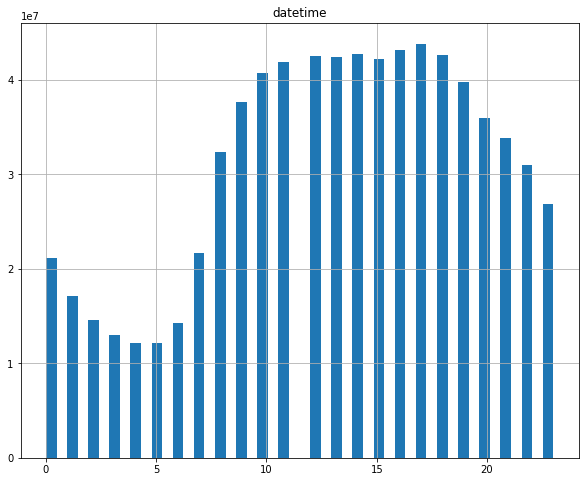

In [93]:
gp_peak.hist('datetime',weights=gp_peak['Amount'] ,bins=48)

In [258]:
################

In [288]:
events = cellphones
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197237 entries, 0 to 2407383
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   CellID       object        
 2   countrycode  int64         
 3   smsin        float64       
 4   smsout       float64       
 5   callin       float64       
 6   callout      float64       
 7   internet     float64       
 8   Amount       float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 1006.9+ MB


In [289]:
events.loc[:,'datetime'] = pd.to_datetime(events.loc[:,'datetime'],format='%Y-%m-%d %H')

In [290]:
gp_events = events.groupby('datetime',as_index = False).count()

In [291]:
gp_events = gp_events.drop(['smsin','smsout','callin','callout','internet','CellID'],axis =1)

In [292]:
gp_events.head()

,datetime,countrycode,Amount
0,2013-11-02 00:00:00,49595,49595
1,2013-11-02 01:00:00,40309,40309
2,2013-11-02 02:00:00,35768,35768
3,2013-11-02 03:00:00,31910,31910
4,2013-11-02 04:00:00,34325,34325


array([[<AxesSubplot:title={'center':'datetime'}>]], dtype=object)

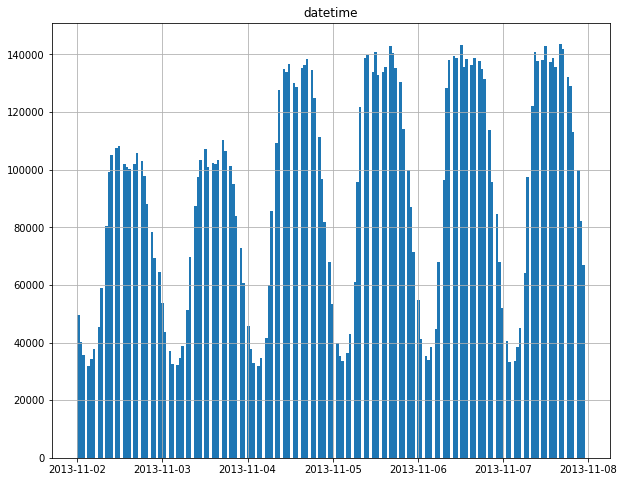

In [293]:
gp_events.hist('datetime',weights=test['Amount'] ,bins=200)

In [294]:
gp2_events =  gp_events

In [295]:
gp2_events.loc[:,'hour'] = gp2_events.loc[:,'datetime'].dt.hour
gp2_events.loc[:,'datetime'] = gp2_events.loc[:,'datetime'].dt.date

In [296]:
gp2_events.head(10)

,datetime,countrycode,Amount,hour
0,2013-11-02,49595,49595,0
1,2013-11-02,40309,40309,1
2,2013-11-02,35768,35768,2
3,2013-11-02,31910,31910,3
4,2013-11-02,34325,34325,4
5,2013-11-02,37919,37919,5
6,2013-11-02,45421,45421,6
7,2013-11-02,58890,58890,7
8,2013-11-02,80581,80581,8
9,2013-11-02,99259,99259,9


In [297]:
gp2_events = gp2_events.reset_index()
Q1 = gp2_events.Amount.quantile(0.25)
Q3 = gp2_events.Amount.quantile(0.75)
IQR = Q3 - Q1
gp2_events = gp2_events[(gp2_events.Amount >= Q3 + 1.5*IQR)]

In [298]:
gp2_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        0 non-null      int64 
 1   datetime     0 non-null      object
 2   countrycode  0 non-null      int64 
 3   Amount       0 non-null      int64 
 4   hour         0 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 0.0+ bytes
